# ML analysis: mood disorder vs control

In [1]:
# importing all the packages I need for all my models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Lasso
import random
pd.options.mode.chained_assignment = None

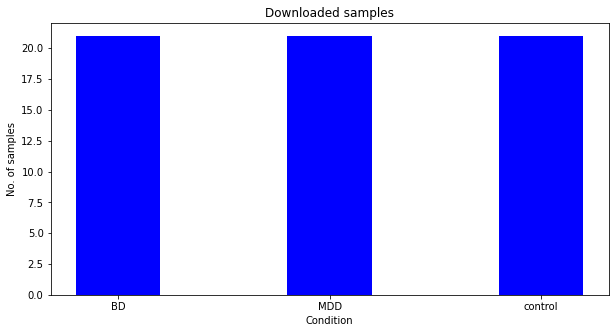

In [4]:
# creating the dataset
data = {'BD':21, 'MDD':21, 'control':21}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
		width = 0.4)

plt.xlabel("Condition")
plt.ylabel("No. of samples")
plt.title("Downloaded samples")
plt.show()


## Transcripts for ML input

I used two sets of transcripts, each compared with a benchmark set of random transcripts, for ML input:

1. random transcripts compared with transcripts on the MT chromosome
2. trandom transcripts compared with transcripts with the GO term 'mitochondrial respirasome'

### Random transcripts

In [2]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=13)
randomtx_MTchr = ['ENST00000600080.5','ENST00000397572.5','ENST00000635877.1','ENST00000543942.6',
'ENST00000286494.9','ENST00000605544.1','ENST00000561852.5','ENST00000429670.3',
'ENST00000511500.1','ENST00000475796.5','ENST00000547135.5','ENST00000605689.1',
'ENST00000492310.5']

In [3]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=255)
randomtx_MTresp = ['ENST00000535515.5','ENST00000574494.1','ENST00000531227.1','ENST00000563462.1',
'ENST00000518450.5','ENST00000641655.1','ENST00000369669.5','ENST00000627703.2',
'ENST00000531427.5','ENST00000452554.3','ENST00000548524.5','ENST00000533270.1',
'ENST00000636277.1','ENST00000580806.5','ENST00000444189.7','ENST00000588683.1',
'ENST00000569320.5','ENST00000432343.1','ENST00000402297.6','ENST00000632698.1',
'ENST00000381286.7','ENST00000652439.1','ENST00000473413.1','ENST00000447555.5',
'ENST00000379651.7','ENST00000393867.5','ENST00000508053.5','ENST00000537833.5',
'ENST00000620667.1','ENST00000473647.1','ENST00000430838.2','ENST00000508208.5',
'ENST00000586762.2','ENST00000422787.1','ENST00000644629.1','ENST00000620127.3',
'ENST00000593411.1','ENST00000591228.4','ENST00000361733.7','ENST00000472541.5',
'ENST00000414977.5','ENST00000556079.1','ENST00000371208.4','ENST00000511891.5',
'ENST00000347401.7','ENST00000478640.6','ENST00000483371.1','ENST00000367058.7',
'ENST00000639822.1','ENST00000439752.1','ENST00000374885.5','ENST00000253925.11',
'ENST00000419015.1','ENST00000520992.5','ENST00000343599.5','ENST00000472864.1',
'ENST00000456906.5','ENST00000544168.5','ENST00000467490.5','ENST00000533498.1',
'ENST00000496105.1','ENST00000633965.1','ENST00000565585.5','ENST00000207636.9',
'ENST00000542832.1','ENST00000490348.1','ENST00000442232.1','ENST00000640582.2',
'ENST00000448958.2','ENST00000634908.1','ENST00000470954.2','ENST00000416465.5',
'ENST00000479323.1','ENST00000478224.5','ENST00000572244.5','ENST00000431286.1',
'ENST00000585531.1','ENST00000475994.1','ENST00000491728.5','ENST00000619532.1',
'ENST00000611198.4','ENST00000580145.5','ENST00000320665.10','ENST00000565546.5',
'ENST00000453375.1','ENST00000632533.1','ENST00000486535.1','ENST00000310078.12',
'ENST00000402399.6','ENST00000507142.5','ENST00000622674.1','ENST00000478475.5',
'ENST00000512818.5','ENST00000374840.8','ENST00000555573.5','ENST00000495742.5',
'ENST00000549451.1','ENST00000507115.5','ENST00000237163.9','ENST00000650921.1',
'ENST00000492457.1','ENST00000483378.1','ENST00000453856.5','ENST00000638438.1',
'ENST00000628302.2','ENST00000469014.1','ENST00000525605.1','ENST00000478680.1',
'ENST00000643493.1','ENST00000640045.1','ENST00000466375.2','ENST00000643537.1',
'ENST00000342669.7','ENST00000511593.6','ENST00000602622.5','ENST00000560913.1',
'ENST00000326183.3','ENST00000300870.15','ENST00000640690.1','ENST00000632297.1',
'ENST00000391411.10','ENST00000409324.7','ENST00000548732.2','ENST00000418576.3',
'ENST00000505441.1','ENST00000427822.6','ENST00000453515.1','ENST00000372183.7',
'ENST00000526686.1','ENST00000469169.5','ENST00000588492.5','ENST00000423263.5',
'ENST00000372611.5','ENST00000498836.5','ENST00000564132.1','ENST00000524603.1',
'ENST00000468878.1','ENST00000471097.1','ENST00000395305.7','ENST00000602865.1',
'ENST00000382315.7','ENST00000518154.5','ENST00000534783.1','ENST00000457662.2',
'ENST00000537562.5','ENST00000642520.1','ENST00000632958.1','ENST00000585879.1',
'ENST00000426266.5','ENST00000461659.1','ENST00000638304.1','ENST00000419794.1',
'ENST00000481453.5','ENST00000443437.6','ENST00000477695.5','ENST00000558092.1',
'ENST00000643264.1','ENST00000332826.7','ENST00000451587.5','ENST00000534760.1',
'ENST00000481032.1','ENST00000265689.9','ENST00000607208.1','ENST00000382032.3',
'ENST00000510299.2','ENST00000466626.1','ENST00000528628.5','ENST00000526842.5',
'ENST00000475405.2','ENST00000534688.2','ENST00000596682.5','ENST00000472867.2',
'ENST00000381567.8','ENST00000418646.5','ENST00000383130.7','ENST00000410040.5',
'ENST00000488876.5','ENST00000358912.5','ENST00000533695.1','ENST00000568545.5',
'ENST00000448299.6','ENST00000422720.2','ENST00000473946.1','ENST00000401672.7',
'ENST00000564192.5','ENST00000506646.5','ENST00000622731.4','ENST00000421470.1',
'ENST00000592814.5','ENST00000527790.5','ENST00000510493.5','ENST00000273590.3',
'ENST00000576460.5','ENST00000642399.1','ENST00000583328.5','ENST00000619160.4',
'ENST00000348261.11','ENST00000397472.6','ENST00000457841.5','ENST00000341686.7',
'ENST00000480859.5','ENST00000545955.5','ENST00000621629.4','ENST00000436730.7',
'ENST00000538766.1','ENST00000432228.1','ENST00000495855.1','ENST00000567921.1',
'ENST00000496784.1','ENST00000220531.7','ENST00000549482.1','ENST00000428931.6',
'ENST00000415077.1','ENST00000492838.1','ENST00000543539.1','ENST00000562008.5',
'ENST00000519082.5','ENST00000608830.5','ENST00000498181.6','ENST00000468607.1',
'ENST00000646379.1','ENST00000633452.1','ENST00000609658.1','ENST00000525990.1',
'ENST00000579140.5','ENST00000620763.1','ENST00000487389.5','ENST00000482397.1',
'ENST00000489123.1','ENST00000530553.1','ENST00000529311.5','ENST00000426683.5',
'ENST00000518855.5','ENST00000640831.1','ENST00000485277.1','ENST00000451664.1',
'ENST00000535955.5','ENST00000499453.2','ENST00000533651.1','ENST00000587646.1',
'ENST00000381392.5','ENST00000402105.7','ENST00000400318.6','ENST00000493625.5',
'ENST00000544078.2','ENST00000294337.7','ENST00000603850.1','ENST00000389574.7',
'ENST00000248054.9','ENST00000465841.1','ENST00000483949.1','ENST00000469838.5',
'ENST00000359866.9','ENST00000291700.9', 'ENST00000477078.2']

### Transcripts on MT chromosome

In [4]:
# reading in MT transcripts from MT chromosome
mt_tx = pd.read_csv("/Users/elenazhang/ncbi/public/sra/mt.txt", delimiter = "\t")
mt_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000210049,ENSG00000210049.1,ENST00000387314,ENST00000387314.1
1,ENSG00000211459,ENSG00000211459.2,ENST00000389680,ENST00000389680.2
2,ENSG00000210077,ENSG00000210077.1,ENST00000387342,ENST00000387342.1
3,ENSG00000210082,ENSG00000210082.2,ENST00000387347,ENST00000387347.2
4,ENSG00000209082,ENSG00000209082.1,ENST00000386347,ENST00000386347.1


In [5]:
mt_tx_ids = mt_tx["Transcript stable ID version"].to_list()
print(mt_tx_ids)
len(mt_tx_ids)

['ENST00000387314.1', 'ENST00000389680.2', 'ENST00000387342.1', 'ENST00000387347.2', 'ENST00000386347.1', 'ENST00000361390.2', 'ENST00000387365.1', 'ENST00000387372.1', 'ENST00000387377.1', 'ENST00000361453.3', 'ENST00000387382.1', 'ENST00000387392.1', 'ENST00000387400.1', 'ENST00000387405.1', 'ENST00000387409.1', 'ENST00000361624.2', 'ENST00000387416.2', 'ENST00000387419.1', 'ENST00000361739.1', 'ENST00000387421.1', 'ENST00000361851.1', 'ENST00000361899.2', 'ENST00000362079.2', 'ENST00000387429.1', 'ENST00000361227.2', 'ENST00000387439.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000387441.1', 'ENST00000387449.1', 'ENST00000387456.1', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000387459.1', 'ENST00000361789.2', 'ENST00000387460.2', 'ENST00000387461.2']


37

### Transcripts with GO term 'mitochondrial respirasome'

In [6]:
mtres_tx = pd.read_csv("/Volumes/horizons/mart_export_mtrespirasome.txt", delimiter = "\t")
mtres_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
1,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
2,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
3,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
4,ENSG00000198763,ENSG00000198763.3,ENST00000361453,ENST00000361453.3


In [7]:
mtres_tx_ids = mtres_tx["Transcript stable ID version"].to_list()
print(mtres_tx_ids)
len(mtres_tx_ids)

['ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361739.1', 'ENST00000362079.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361335.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000361789.2', 'ENST00000361789.2', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000607132.1', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000605927.3', 'ENST00000630511.1', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST0000062

881

## Metadata and matrix preparation

In [8]:
matrix_moodcontrol = pd.read_csv("/Volumes/horizons/test/6_analysis/sleuth_matrix.csv")

In [9]:
# reorgnising matrix
matrix_moodcontrol_T = matrix_moodcontrol.T
matrix_moodcontrol_T.columns = matrix_moodcontrol_T.iloc[0]
matrix_moodcontrol_T = matrix_moodcontrol_T[1:]
matrix_moodcontrol_T = matrix_moodcontrol_T.reset_index()
matrix_moodcontrol_T.head()

Unnamed: 0,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652760.1,ENST00000652762.1,ENST00000652763.1,ENST00000652764.1,ENST00000652765.1,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1
0,SRR3438571,2493.540838,1299.627519,1206.714698,4049.835481,201.939264,204.133178,259.177282,5396.600111,387.236811,...,17.8434,521.304132,5.856409,95.976772,8.552877,0.0,36.700048,0.0,16.753679,27.688194
1,SRR3438572,2451.88057,1316.523092,952.631895,3986.685156,262.439008,190.812126,259.238435,5565.660737,363.668549,...,23.652979,530.348965,10.736065,100.085326,0.0,0.0,15.570959,0.0,18.124289,22.225599
2,SRR3438573,2277.216299,1245.281945,863.304446,7328.086451,337.27285,272.429824,137.366648,6616.13265,263.323396,...,32.215291,497.994645,2.087245,146.769642,0.0,0.0,20.173199,0.0,0.0,12.403731
3,SRR3438574,2293.448672,1276.705771,1255.618662,7222.808256,436.819018,286.66007,156.432794,6675.053681,271.443308,...,1.89224,470.490254,0.0,159.697778,8.514174,0.0,16.631115,0.0,0.0,20.801344
4,SRR3438576,2168.878334,1340.455924,1444.86787,4044.248071,776.730964,243.519234,200.911905,5937.88559,268.175461,...,0.0,459.405877,0.0,50.881593,0.0,0.0,30.215874,2.929222,0.0,74.959823


In [10]:
# reading in metadata for mood and control samples
metadata_moodcontrol = pd.read_csv("/Volumes/horizons/test/6_metadata/metadata.txt", delimiter = "\t")
metadata_moodcontrol.head()

,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438571,BD,69,male,Caucasian
1,SRR3438572,BD,69,male,Caucasian
2,SRR3438573,MDD,48,female,Caucasian
3,SRR3438574,MDD,48,female,Caucasian
4,SRR3438576,MDD,46,male,Caucasian


In [11]:
# merging matrix with metadata
matrix_metadata_moodcontrol = matrix_moodcontrol_T.merge(metadata_moodcontrol, left_on="index", right_on="sample")
matrix_metadata_moodcontrol.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438571,2493.540838,1299.627519,1206.714698,4049.835481,201.939264,204.133178,259.177282,5396.600111,387.236811,...,0.0,36.700048,0.0,16.753679,27.688194,SRR3438571,BD,69,male,Caucasian
1,SRR3438572,2451.88057,1316.523092,952.631895,3986.685156,262.439008,190.812126,259.238435,5565.660737,363.668549,...,0.0,15.570959,0.0,18.124289,22.225599,SRR3438572,BD,69,male,Caucasian
2,SRR3438573,2277.216299,1245.281945,863.304446,7328.086451,337.27285,272.429824,137.366648,6616.13265,263.323396,...,0.0,20.173199,0.0,0.0,12.403731,SRR3438573,MDD,48,female,Caucasian
3,SRR3438574,2293.448672,1276.705771,1255.618662,7222.808256,436.819018,286.66007,156.432794,6675.053681,271.443308,...,0.0,16.631115,0.0,0.0,20.801344,SRR3438574,MDD,48,female,Caucasian
4,SRR3438576,2168.878334,1340.455924,1444.86787,4044.248071,776.730964,243.519234,200.911905,5937.88559,268.175461,...,0.0,30.215874,2.929222,0.0,74.959823,SRR3438576,MDD,46,male,Caucasian


In [12]:
# making the covariates binary values
matrix_metadata_moodcontrol['gender_binary'] = matrix_metadata_moodcontrol['gender'].replace({'female':0, 'male':1})
matrix_metadata_moodcontrol['ethnicity_binary'] = np.where(
    matrix_metadata_moodcontrol["ethnicity"] == "Caucasian", 1, 0)
matrix_metadata_moodcontrol['diagnosis_binary'] = np.where(
    matrix_metadata_moodcontrol["clinical_diagnosis"] == "control", 0, 1)
matrix_metadata_moodcontrol.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity,gender_binary,ethnicity_binary,diagnosis_binary
0,SRR3438571,2493.540838,1299.627519,1206.714698,4049.835481,201.939264,204.133178,259.177282,5396.600111,387.236811,...,16.753679,27.688194,SRR3438571,BD,69,male,Caucasian,1,1,1
1,SRR3438572,2451.88057,1316.523092,952.631895,3986.685156,262.439008,190.812126,259.238435,5565.660737,363.668549,...,18.124289,22.225599,SRR3438572,BD,69,male,Caucasian,1,1,1
2,SRR3438573,2277.216299,1245.281945,863.304446,7328.086451,337.27285,272.429824,137.366648,6616.13265,263.323396,...,0.0,12.403731,SRR3438573,MDD,48,female,Caucasian,0,1,1
3,SRR3438574,2293.448672,1276.705771,1255.618662,7222.808256,436.819018,286.66007,156.432794,6675.053681,271.443308,...,0.0,20.801344,SRR3438574,MDD,48,female,Caucasian,0,1,1
4,SRR3438576,2168.878334,1340.455924,1444.86787,4044.248071,776.730964,243.519234,200.911905,5937.88559,268.175461,...,0.0,74.959823,SRR3438576,MDD,46,male,Caucasian,1,1,1


In [13]:
tx_moodcontrol = list(matrix_metadata_moodcontrol)
tx_moodcontrol

['index',
 'ENST00000000233.10',
 'ENST00000000412.8',
 'ENST00000000442.11',
 'ENST00000001008.6',
 'ENST00000001146.6',
 'ENST00000002125.9',
 'ENST00000002165.10',
 'ENST00000002501.10',
 'ENST00000002596.6',
 'ENST00000002829.8',
 'ENST00000003084.10',
 'ENST00000003100.13',
 'ENST00000003302.8',
 'ENST00000003583.12',
 'ENST00000003912.7',
 'ENST00000004103.8',
 'ENST00000004531.14',
 'ENST00000004982.6',
 'ENST00000005082.13',
 'ENST00000005178.6',
 'ENST00000005180.8',
 'ENST00000005226.12',
 'ENST00000005257.7',
 'ENST00000005259.8',
 'ENST00000005260.9',
 'ENST00000005284.3',
 'ENST00000005286.8',
 'ENST00000005340.10',
 'ENST00000005374.10',
 'ENST00000005386.8',
 'ENST00000005558.8',
 'ENST00000005756.4',
 'ENST00000005995.8',
 'ENST00000006015.3',
 'ENST00000006053.7',
 'ENST00000006251.11',
 'ENST00000006275.8',
 'ENST00000006658.11',
 'ENST00000006724.7',
 'ENST00000006750.7',
 'ENST00000006777.11',
 'ENST00000007264.7',
 'ENST00000007390.3',
 'ENST00000007414.8',
 'ENST0

## Subsetting to transcripts

### Subsetting to random transcripts for MT chromosome

In [14]:
# random transcripts for MT chromosome
randMTchr_moodcontrol = list(set(tx_moodcontrol).intersection(set(randomtx_MTchr)))
len(randMTchr_moodcontrol)

13

In [15]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTchrsubset_moodcontrol = matrix_metadata_moodcontrol[randomtx_MTchr+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTchrsubset_moodcontrol.head()

,ENST00000600080.5,ENST00000397572.5,ENST00000635877.1,ENST00000543942.6,ENST00000286494.9,ENST00000605544.1,ENST00000561852.5,ENST00000429670.3,ENST00000511500.1,ENST00000475796.5,ENST00000547135.5,ENST00000605689.1,ENST00000492310.5,gender_binary,ethnicity_binary,age_at_death
0,0.0,75.639921,20.374643,0.0,2637.99169,0.0,5.217957,0.0,0.0,0.0,2.798432,28.668662,40.879711,1,1,69
1,0.0,67.897628,49.050365,0.0,2612.180131,0.721768,4.554304,0.0,0.0,0.0,5.269052,27.129276,41.867108,1,1,69
2,0.0,84.662876,232.440719,0.0,2738.751843,0.0,0.0,0.0,0.0,0.0,0.0,36.191027,49.0754,0,1,48
3,0.0,72.713092,54.641362,0.0,2450.046993,0.0,0.0,0.0,0.0,0.0,8.99339,31.253086,38.670442,0,1,48
4,0.0,64.985957,6.693234,2.188222,4114.495439,0.0,11.491376,0.0,0.0,0.0,0.0,21.041372,66.399449,1,1,46


In [16]:
# input/output info
x = randMTchrsubset_moodcontrol
y = matrix_metadata_moodcontrol["clinical_diagnosis"].replace({"BD":1, "MDD":1, "control":0})

### Subsetting to transcripts on MT chromosome

In [16]:
# finding MT transcripts that are in the BDcontrol transcripts
MTintersection_moodcontrol = list(set(tx_moodcontrol).intersection(set(mt_tx_ids)))
len(MTintersection_moodcontrol)

13

In [17]:
MTsubset_moodcontrol = matrix_metadata_moodcontrol[MTintersection_moodcontrol+['gender_binary', 'ethnicity_binary', 'age_at_death']]
MTsubset_moodcontrol.head()

,ENST00000361390.2,ENST00000361739.1,ENST00000361899.2,ENST00000361227.2,ENST00000362079.2,ENST00000361453.3,ENST00000361624.2,ENST00000361789.2,ENST00000361381.2,ENST00000361681.2,ENST00000361567.2,ENST00000361851.1,ENST00000361335.1,gender_binary,ethnicity_binary,age_at_death
0,278296.396293,164691.66051,196888.705455,20629.6326,152223.365643,213465.258322,954233.986697,165112.003706,528295.84212,40238.113011,205543.162405,17199.263391,34863.236019,1,1,69
1,277319.902186,164775.92007,198748.997028,20715.923107,152480.075799,215154.772729,959908.086028,166951.709851,528640.976403,40912.501087,205831.919579,17861.024283,35285.494262,1,1,69
2,278509.062965,173373.76498,217302.282657,18529.951189,165858.11727,204701.85068,908950.76586,267515.85982,717460.55515,35246.648588,176073.335047,16611.288885,38352.64316,0,1,48
3,278191.853273,173126.487116,219358.79458,18273.471159,166371.30254,205761.761075,911715.151385,268884.59594,720798.287563,35388.790653,176633.617212,16821.299197,38473.884207,0,1,48
4,443220.977551,233452.839207,338183.370708,29965.831182,248784.628068,363709.037247,1805000.296801,401546.937605,1022877.514016,61652.667745,316386.465381,34087.110043,57750.629429,1,1,46


In [19]:
# input/output info
x = MTsubset_moodcontrol
y = matrix_metadata_moodcontrol["clinical_diagnosis"].replace({"BD":1, "MDD":1, "control":0})

### Subsetting to random transcripts for MT respirasome

In [18]:
# random transcripts for MT respirasome
randMTresp_moodcontrol = list(set(tx_moodcontrol).intersection(set(randomtx_MTresp)))
len(randMTresp_moodcontrol)

255

In [19]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTrespsubset_moodcontrol = matrix_metadata_moodcontrol[randomtx_MTresp+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTrespsubset_moodcontrol.head()

,ENST00000535515.5,ENST00000574494.1,ENST00000531227.1,ENST00000563462.1,ENST00000518450.5,ENST00000641655.1,ENST00000369669.5,ENST00000627703.2,ENST00000531427.5,ENST00000452554.3,...,ENST00000248054.9,ENST00000465841.1,ENST00000483949.1,ENST00000469838.5,ENST00000359866.9,ENST00000291700.9,ENST00000477078.2,gender_binary,ethnicity_binary,age_at_death
0,0.0,0.0,0.0,360.681299,10.93333,89.135639,7.578544,0.0,0.0,73.492282,...,4739.950182,0.0,0.0,109.217882,1054.968109,1933.622187,15.689114,1,1,69
1,0.0,0.0,3.694299,294.915982,4.721488,81.437456,0.00017,6.568666,0.0,117.363544,...,4948.088314,0.0,0.0,154.867607,1009.610759,1980.271099,5.729268,1,1,69
2,0.0,0.0,0.0,322.433631,14.040796,117.293053,9.068037,0.0,0.0,150.30659,...,7866.256031,0.0,0.0,59.586666,1224.283668,832.530903,15.367493,0,1,48
3,0.0,0.0,0.0,336.735188,17.076429,101.927331,7.638806,0.0,0.0,121.999907,...,8011.009958,0.503033,0.0,82.551778,1179.476178,708.982192,10.06137,0,1,48
4,0.0,0.0,0.0,249.402894,22.592114,75.304673,0.0,1.055679,0.0,163.866049,...,6579.278581,0.0,0.0,148.917694,978.009442,1162.521273,9.574706,1,1,46


In [22]:
# input/output info
x = randMTrespsubset_moodcontrol
y = matrix_metadata_moodcontrol["clinical_diagnosis"].replace({"BD":1, "MDD":1, "control":0})

### Subsetting to transcripts with GO term 'mitochondrial respirasome'

In [20]:
mtresintersection_moodcontrol = list(set(tx_moodcontrol).intersection(set(mtres_tx_ids)))
len(mtresintersection_moodcontrol)

255

In [21]:
# subsetting matrix/metadata file to MT transcripts and covariates
mtressubset_moodcontrol = matrix_metadata_moodcontrol[mtresintersection_moodcontrol+['gender_binary', 'ethnicity_binary', 'age_at_death']]
mtressubset_moodcontrol.head()

,ENST00000463055.1,ENST00000237889.9,ENST00000468711.5,ENST00000354250.7,ENST00000543208.5,ENST00000503997.5,ENST00000454214.1,ENST00000438807.7,ENST00000493866.5,ENST00000373852.9,...,ENST00000592141.6,ENST00000523920.1,ENST00000607132.1,ENST00000451517.5,ENST00000439945.5,ENST00000412366.5,ENST00000610887.2,gender_binary,ethnicity_binary,age_at_death
0,3.206991,171.704016,5.703029,273.368092,1.561904,17.85292,0.0,0.0,57.456169,26.491416,...,0.0,2.58279,9.137512,0.0,0.0,79.076242,11.961218,1,1,69
1,0.0,185.758033,4.174243,277.43823,0.0,8.609811,0.0,0.0,56.259502,10.313875,...,0.0,0.0,5.705735,0.0,63.230842,0.368493,17.692166,1,1,69
2,2.35463,206.46065,6.221683,218.254677,1.581901,3.088743,0.0,0.0,44.947041,0.0,...,0.0,3.64899,13.849483,0.0,30.489969,117.745695,0.0,0,1,48
3,2.298302,203.356893,0.0,253.62562,4.173932,5.140764,5.339684,0.0,80.767912,0.0,...,0.0,4.652685,7.012433,4.528272,109.466595,101.552482,0.0,0,1,48
4,4.928481,229.396852,11.44843,0.0,2.151932,3.378541,0.0,0.0,97.808505,0.0,...,0.0,6.656672,3.989984,0.0,80.954757,62.267102,0.0,1,1,46


In [25]:
# input/output info
x = mtressubset_moodcontrol
y = matrix_metadata_moodcontrol["clinical_diagnosis"].replace({"BD":1, "MDD":1, "control":0})

## ML model creation: Logistic regression

In [27]:
# sub in matrix/metadata file with subsetted mt
x = mtressubset_moodcontrol
y = matrix_metadata_moodcontrol[["diagnosis_binary"]]

In [28]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [29]:
logit = LogisticRegression(solver="lbfgs", max_iter=5000)
logit.fit(x_train, y_train.values.reshape(-1,))

LogisticRegression(max_iter=5000)

In [30]:
y_pred = logit.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

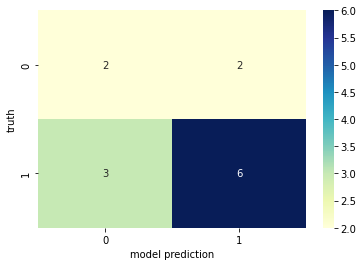

In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [32]:
accuracy_score(y_test, y_pred)

0.6153846153846154

## Neural network

In [105]:
# sub in matrix/metadata file with subsetted mt
X = mtressubset_moodcontrol
Y = matrix_metadata_moodcontrol[["diagnosis_binary"]]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_train).astype(np.float32)
y_test = np.asarray(y_train).astype(np.float32)

In [107]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [108]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
history = model.fit(x_train, y_train, epochs=200,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 87ms/step - loss: 7562.0088 - accuracy: 0.6750 - val_loss: 4781.8374 - val_accuracy: 0.6000
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 2806.2036 - accuracy: 0.6750 - val_loss: 636.1813 - val_accuracy: 0.6000
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 2684.1338 - accuracy: 0.4250 - val_loss: 1483.9934 - val_accuracy: 0.4000
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 1707.8965 - accuracy: 0.4750 - val_loss: 1175.1536 - val_accuracy: 0.6000
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 1467.0393 - accuracy: 0.6750 - val_loss: 2233.1897 - val_accuracy: 0.6000
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 1735.9802 - accuracy: 0.7000 - val_loss: 1508.7910 - val_accuracy: 0.6000
Epoch 7/200
4/4 [==============================] - 0s 23ms/step - loss: 853.6371 - accuracy: 0.6250 - val_loss: 578.0937 - va

4/4 [==============================] - 0s 10ms/step - loss: 122.5543 - accuracy: 0.7500 - val_loss: 152.1163 - val_accuracy: 0.7000
Epoch 114/200
4/4 [==============================] - 0s 13ms/step - loss: 123.4067 - accuracy: 0.6750 - val_loss: 61.8655 - val_accuracy: 0.7000
Epoch 115/200
4/4 [==============================] - 0s 11ms/step - loss: 163.7319 - accuracy: 0.6750 - val_loss: 412.7825 - val_accuracy: 0.6000
Epoch 116/200
4/4 [==============================] - 0s 11ms/step - loss: 214.6222 - accuracy: 0.7250 - val_loss: 36.4560 - val_accuracy: 0.6000
Epoch 117/200
4/4 [==============================] - 0s 11ms/step - loss: 134.6228 - accuracy: 0.6750 - val_loss: 135.5007 - val_accuracy: 0.7000
Epoch 118/200
4/4 [==============================] - 0s 11ms/step - loss: 127.2054 - accuracy: 0.7750 - val_loss: 29.7886 - val_accuracy: 0.7000
Epoch 119/200
4/4 [==============================] - 0s 11ms/step - loss: 60.3909 - accuracy: 0.8000 - val_loss: 212.6992 - val_accuracy: 0.7

Epoch 170/200
4/4 [==============================] - 0s 11ms/step - loss: 51.4144 - accuracy: 0.7750 - val_loss: 28.2049 - val_accuracy: 0.8000
Epoch 171/200
4/4 [==============================] - 0s 12ms/step - loss: 52.2791 - accuracy: 0.7500 - val_loss: 61.1058 - val_accuracy: 0.7000
Epoch 172/200
4/4 [==============================] - 0s 11ms/step - loss: 48.6754 - accuracy: 0.8000 - val_loss: 60.0236 - val_accuracy: 0.7000
Epoch 173/200
4/4 [==============================] - 0s 11ms/step - loss: 115.5780 - accuracy: 0.6500 - val_loss: 96.0557 - val_accuracy: 0.7000
Epoch 174/200
4/4 [==============================] - 0s 12ms/step - loss: 117.8143 - accuracy: 0.7000 - val_loss: 62.4924 - val_accuracy: 0.7000
Epoch 175/200
4/4 [==============================] - 0s 11ms/step - loss: 139.8448 - accuracy: 0.7250 - val_loss: 17.8403 - val_accuracy: 0.8000
Epoch 176/200
4/4 [==============================] - 0s 11ms/step - loss: 103.7833 - accuracy: 0.7000 - val_loss: 29.4516 - val_accur

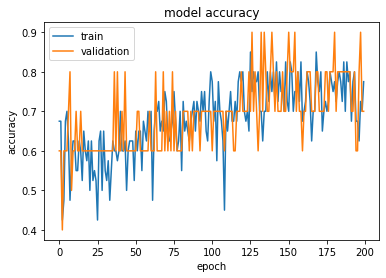

In [110]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

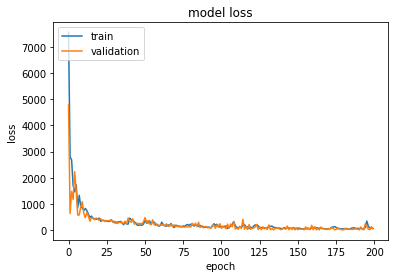

In [111]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [112]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[46.69222640991211, 0.8199999928474426]

In [113]:
predictions = model.predict(x_test)
predictions.round(1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [114]:
np.rint(predictions)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

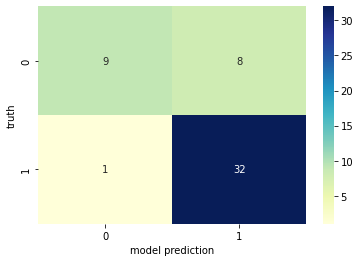

In [115]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## Lasso

In [188]:
# input/output info
x = randMTchrsubset_moodcontrol
y = matrix_metadata_moodcontrol["clinical_diagnosis"].replace({"BD":1, "MDD":1, "control":0})

In [189]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [190]:
clf = LogisticRegression(solver='liblinear', max_iter=5000, penalty="l1")
clf.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear')

In [191]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

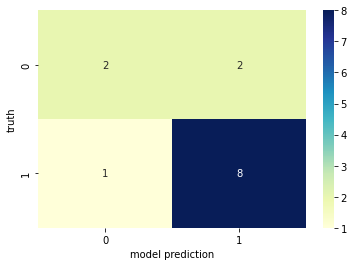

In [192]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [193]:
accuracy_score(y_test, y_pred)

0.7692307692307693

In [194]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 6.37863650e-02  1.75444660e-02 -3.88260254e-03  0.00000000e+00
  -1.63229594e-04  0.00000000e+00  3.59950745e-02 -8.45862066e-02
  -3.01945788e-01 -6.51243399e-01 -2.48555459e-01  8.30708486e-02
  -1.79441309e-03 -8.69511902e-01  0.00000000e+00 -1.13529017e-02]]


In [65]:
print(x.columns.values.tolist())

['ENST00000600080.5', 'ENST00000397572.5', 'ENST00000635877.1', 'ENST00000543942.6', 'ENST00000286494.9', 'ENST00000605544.1', 'ENST00000561852.5', 'ENST00000429670.3', 'ENST00000511500.1', 'ENST00000475796.5', 'ENST00000547135.5', 'ENST00000605689.1', 'ENST00000492310.5', 'gender_binary', 'ethnicity_binary', 'age_at_death']


<AxesSubplot:xlabel='diagnosis_binary', ylabel='ENST00000511500.1'>

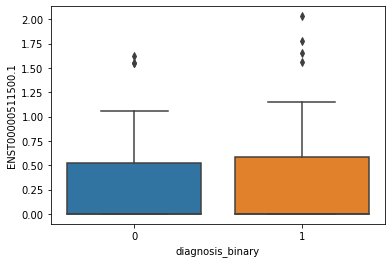

In [200]:
# boxplot of top Lasso feature
matrix_metadata_moodcontrol['ENST00000511500.1']
sns.boxplot(x=matrix_metadata_moodcontrol['diagnosis_binary'], y=matrix_metadata_moodcontrol['ENST00000511500.1'])

### Lasso + CV

In [181]:
clf = LogisticRegressionCV(solver='liblinear', max_iter=5000, penalty="l1", cv=15)
clf.fit(x, y)

LogisticRegressionCV(cv=15, max_iter=5000, penalty='l1', solver='liblinear')

In [182]:
y_pred = clf.predict(x)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [183]:
clf.score(x, y)

0.8412698412698413

In [184]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 1.26949850e-05  0.00000000e+00  2.24245189e-05  0.00000000e+00
   4.38079164e-06 -1.20038586e-06 -6.81866440e-06 -2.76930787e-05
   1.16201871e-05  3.11073835e-06 -8.32760912e-07  0.00000000e+00
  -4.19658698e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


<AxesSubplot:xlabel='diagnosis_binary', ylabel='ENST00000286494.9'>

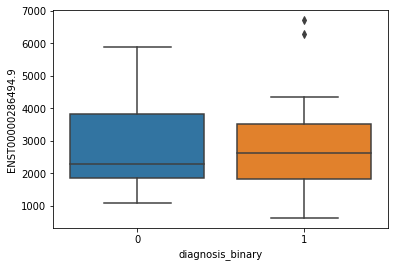

In [90]:
# boxplot of top Lasso feature
matrix_metadata_moodcontrol['ENST00000286494.9']
sns.boxplot(x=matrix_metadata_moodcontrol['diagnosis_binary'], y=matrix_metadata_moodcontrol['ENST00000286494.9'])